# 매매가격지수

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams
plt.rcParams['font.family'] = 'Gulim'

# 데이터 전처리

## 데이터 탐색

In [3]:
df = pd.read_excel('./data_anal_proj/주간 아파트 매매가격지수_20241026.xlsx').T #전치
# 기준시점 = 2022년 1월 10일

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
지역명,전국,서울,강북14개구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,익산시,정읍시,남원시,김제시,완주군,무주군,임실군,순창군,고창군,부안군
2022-10-24 00:00:52,99.070849,99.18946,98.642112,101.272184,99.717712,102.497917,100.275063,100.861178,98.068763,99.979866,...,103.314472,-,-,-,-,-,-,-,-,-
2022-10-31 00:00:52,98.795106,98.891016,98.340583,101.272184,99.436605,102.49509,99.685047,100.549024,97.505763,99.480574,...,103.228605,-,-,-,-,-,-,-,-,-


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 지역명 to 2024-10-21 00:00:52
Columns: 278 entries, 0 to 277
dtypes: object(278)
memory usage: 222.3+ KB


In [6]:
df.index

Index([              '지역명', 2022-10-24 00:00:52, 2022-10-31 00:00:52,
       2022-11-07 00:00:52, 2022-11-14 00:00:52, 2022-11-21 00:00:52,
       2022-11-28 00:00:52, 2022-12-05 00:00:52, 2022-12-12 00:00:52,
       2022-12-19 00:00:52,
       ...
       2024-08-12 00:00:52, 2024-08-19 00:00:52, 2024-08-26 00:00:52,
       2024-09-02 00:00:52, 2024-09-09 00:00:52, 2024-09-23 00:00:52,
       2024-09-30 00:00:52, 2024-10-07 00:00:52, 2024-10-14 00:00:52,
       2024-10-21 00:00:52],
      dtype='object', length=102)

In [7]:
df.columns

RangeIndex(start=0, stop=278, step=1)

In [8]:
df.values

array([['전국', '서울', '강북14개구', ..., '순창군', '고창군', '부안군'],
       [99.0708493866, 99.1894600883, 98.6421123459, ..., '-', '-', '-'],
       [98.7951060762, 98.8910158334, 98.3405832616, ..., '-', '-', '-'],
       ...,
       [89.6410716919, 92.7004615957, 89.494904882, ..., 100.103644493,
        119.9303488834, 115.8489741279],
       [89.6606539371, 92.815979082, 89.579069324, ..., 100.103644493,
        120.3119086999, 116.1046278547],
       [89.6593535029, 92.8860756572, 89.621939432, ..., 100.103644493,
        120.4256538296, 116.1046278547]], dtype=object)

## 필요한 데이터만 추출

In [9]:
seoul_columns = list ( df.values[0][:29] ) #추출할 서울 구 확인
seoul_columns

['전국',
 '서울',
 '강북14개구',
 '종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '강남11개구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [10]:
df_seoul = df.drop(df.columns[29:], axis=1) # 서울 외 지역 칼럼에서 제외
df_seoul.head(3)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
지역명,전국,서울,강북14개구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2022-10-24 00:00:52,99.070849,99.18946,98.642112,101.272184,99.717712,102.497917,100.275063,100.861178,98.068763,99.979866,...,99.020554,99.26656,100.632243,100.303474,99.979376,99.073292,101.751461,100.759438,98.414179,98.639627
2022-10-31 00:00:52,98.795106,98.891016,98.340583,101.272184,99.436605,102.49509,99.685047,100.549024,97.505763,99.480574,...,98.669492,98.891019,100.547774,100.180451,99.83924,98.666179,101.611413,100.631919,97.910094,98.1521


In [11]:
df_seoul.columns = seoul_columns #칼럼 다시 세팅
df_seoul = df_seoul.iloc[1:]
df_seoul.head(3)

,전국,서울,강북14개구,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2022-10-24 00:00:52,99.070849,99.18946,98.642112,101.272184,99.717712,102.497917,100.275063,100.861178,98.068763,99.979866,...,99.020554,99.26656,100.632243,100.303474,99.979376,99.073292,101.751461,100.759438,98.414179,98.639627
2022-10-31 00:00:52,98.795106,98.891016,98.340583,101.272184,99.436605,102.49509,99.685047,100.549024,97.505763,99.480574,...,98.669492,98.891019,100.547774,100.180451,99.83924,98.666179,101.611413,100.631919,97.910094,98.1521
2022-11-07 00:00:52,98.501147,98.575584,98.052583,101.268392,99.392767,102.493081,99.225065,100.51826,96.929447,99.436585,...,98.302983,98.77532,100.4583,99.935255,99.419935,98.473589,101.384919,100.246658,97.110537,97.899536


## 이상치 처리

In [12]:
df_seoul.isnull().sum().sum() #결측치 개수 확인

0

In [13]:
df_seoul.index #행이름 예외 발견

Index([2022-10-24 00:00:52, 2022-10-31 00:00:52, 2022-11-07 00:00:52,
       2022-11-14 00:00:52, 2022-11-21 00:00:52, 2022-11-28 00:00:52,
       2022-12-05 00:00:52, 2022-12-12 00:00:52, 2022-12-19 00:00:52,
       2022-12-26 00:00:52,
       ...
       2024-08-12 00:00:52, 2024-08-19 00:00:52, 2024-08-26 00:00:52,
       2024-09-02 00:00:52, 2024-09-09 00:00:52, 2024-09-23 00:00:52,
       2024-09-30 00:00:52, 2024-10-07 00:00:52, 2024-10-14 00:00:52,
       2024-10-21 00:00:52],
      dtype='object', length=101)

In [14]:
df_seoul.index.get_indexer(['2024.01.01']) #예외 행의 인덱스값 확인

array([60], dtype=int64)

In [15]:
df_seoul = df_seoul.drop( df_seoul.index[60] ) #예외 행 지우기

## 파일로 저장

In [17]:
df_seoul.to_csv('data_maemae.csv', index=False)

## 시각화

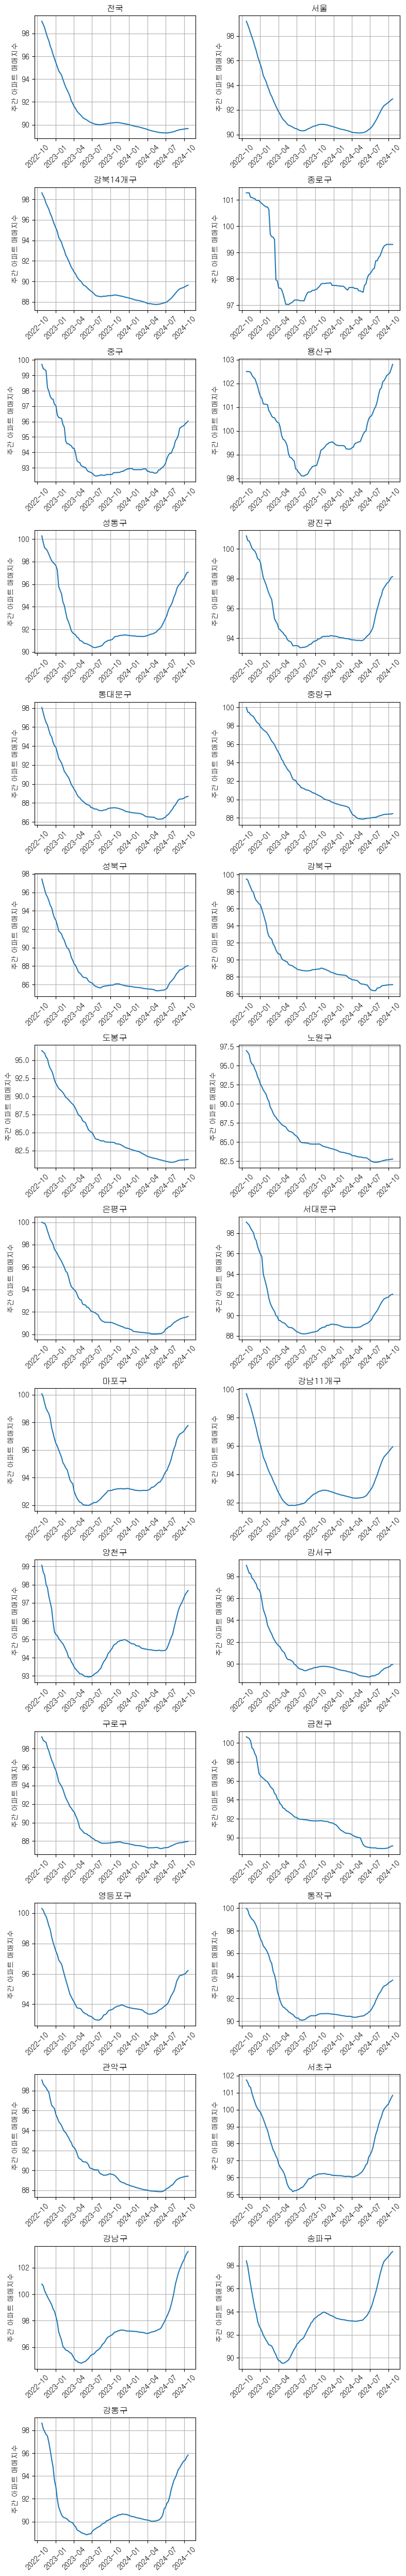

In [265]:
fig = plt.figure(figsize=(8,50))
i = 1

num_plots = len(seoul_columns)
rows = (num_plots // 2) + 1  # 2열로 나눌 경우 필요한 행 수 계산

for gu in seoul_columns:
    plt.subplot(rows,2,i)
    plt.plot(df_seoul.index, df_seoul[gu])
    plt.title(gu)
    plt.ylabel('주간 아파트 매매가격지수')
    
    plt.xticks(rotation=45)  # x축 레이블 회전
    plt.grid()  # 그리드 추가
    i += 1
    
plt.tight_layout()  # 레이아웃 조정
plt.show()

# 데이터 분석

강남3구 서울 집값 주도

강남이 오르고 강북이 따라가는 추세

강남 : 서초, 강남, 송파 가 집값 주도. 영등포, 동작, 강동, 양천 뒤따라감. 나머지는 바닥을 찍고 따라가려는 추세

강북 : 마포, 용산, 성동 이 집값 주도. 종로, 중구가 뒤따르고 나머지는 바닥을 찍고 따라가려는 추세. 노원, 도봉, 강북 바닥. 